## Final Project Submission

Please fill out:
* Student name: David Braslow
* Student pace: self paced 
* Scheduled project review date/time: Fri March 8, 2019
* Instructor name: Eli
* Blog post URL: TBD


# Introduction

This project aims to use features of house listing to predict house sale prices. I will do this using the OSEMN framework.  First, I will obtain the dataset by importing the static csv file in this repository. Then I will scrub the data, ensuring that all features are clear of missing values and properly encoded. Next, I will explore the data using various visualizations and tabulations. Next, I will model the data using multiple regression, evaluating and refining my model iteratively. Lastly, I will interpret the results of the final model. 

# Obtain the Data

In this section, I obtain the dataset. The dataset is stored in the repository as a .csv file: kc_house_data.csv

## Initializing

In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns
import statsmodels as sm
import scipy.stats as stats
import statsmodels.api as smapi
from scipy.stats import kurtosis, skew
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [3]:
#Visualization options
%matplotlib notebook
plt.style.use('seaborn')

## Data Import

In [4]:
#Data import
df = pd.read_csv('kc_house_data.csv')

# Scrub the Data

In this section, I scrub the dataset. I do this by describing the dataset as a whole and then by scrubbing each individual variable.

## Dataset Summary

In this section, I explore the dataset by gathering information about the fields in the dataset.

In [5]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Dropping unnecessary variables

The column_names.md file describes the id column as a unique identifier for each house. Given tha a house can be sold multiple times, it is plausible that there are multiple observations with the same id number. I will check how often this seems to be the case, then decide how to handle it

In [8]:
#ID seems to be a unique number - checking for duplicates
df['id'].duplicated().sum()

177

There are 177 records for houses that have been previously sold. Given that this is less than 1% of our dataset, this is unlikely to be useful information. Since the id number doesn't seem to contain any other useful information, I will drop it from my dataset.

In [9]:
df = df.drop('id', axis = 1)

## Dealing with Missing Values

The following variables seem to have missing values, based on the output above: waterfront, view, yr_renovated. For all three variables, I will deal with missing values by imputing their median values: zero.

In [10]:
df.fillna(0, inplace = True)

## Fixing Variable Encodings

### date

The column_names.md file describes the date column as the date the house was sold, but it is currently stored as an object type. I will convert this into datetime format. 

In [11]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

### sqft_basement

This variable captures the area of the basement, which should be numeric, but the variable is currently stored as an object. Let's figure out qhy and fix it.

In [12]:
df['sqft_basement'].value_counts()[0:10]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
Name: sqft_basement, dtype: int64

It seems that about 2% of the houses have '?' as a value for the basement area, but over half have values of zero. It seems that the best way to handle this variable may be to convert it into a categorical variable, including categories for 0 and ?, as well as categories based on size for houses that have basement area measurements.

In [13]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: '-1' if x == '?' else x)
df['sqft_basement'] = df['sqft_basement'].astype('float64').round()
df['sqft_basement'] = df['sqft_basement'].astype('int64')
#Describe the values over 0
df['sqft_basement'][df['sqft_basement'] > 0].describe()

count    8317.000000
mean      741.928700
std       404.765113
min        10.000000
25%       450.000000
50%       700.000000
75%       980.000000
max      4820.000000
Name: sqft_basement, dtype: float64

In [14]:
#Divide this variable into quartiles for houses with values over 0
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 1 if (x > 0) & (x < 450) else x)
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 2 if (x >= 450) & (x < 700) else x)
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 3 if (x >= 700) & (x < 980) else x)
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 4 if (x >= 980) else x)
df['sqft_basement'] = df['sqft_basement'].astype('category')
df['sqft_basement'].value_counts()

 0    12826
 3     2198
 4     2083
 1     2070
 2     1966
-1      454
Name: sqft_basement, dtype: int64

### yr_renovated

This variable should be an integer, but is stored as a float. The median value is also 0, which I assume means 'not renovated', not 'renovated over 2000 years ago'. Want to check what's going on.

In [15]:
df['yr_renovated'].value_counts().head(10)

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
Name: yr_renovated, dtype: int64

Almost all of the houses have 0 for the year renovated. I will recode this as a dummy indicator for whether there is any value here other than zero.

In [16]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else x)
df['renovated'] = df['renovated'].astype('category')
df = df.drop('yr_renovated', axis = 1)

## Categorical Variables Encoded as Numeric

### bedrooms

This is a count variable, so I will encode it as categorical.

In [17]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

It seems that all values are integers, and that most houses have 3 or 4 bedrooms. However, there is one house with a very large number of bedrooms: 33! That's a lot of housekeeping... I will convert this variable into a categorical one, with a single bucket for large values. I will set this at 7 or above, given the small number of houses in each of those categories.

In [18]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: 7 if x > 7 else x)
df['bedrooms'] = df['bedrooms'].astype('category')

### bathrooms

This column seems to capture the number of bathrooms in the house, which in theory could be categorical. Since listings sometimes advertise half-baths, this is not an integer variable. I will convert it to a category by rounding it.

In [19]:
df['bathrooms'] = df['bathrooms'].round().astype('category')

### floors

This variable captures the number of floors in a house, which should be categorical. However, it is not an int, so there may be some strange values.

In [20]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

I'm not sure what a half a floor is, but according to Google, it is a valid way that some listings show stories with low heights. I will therefore recode this as categorical using the values present. However, I will round 3.5 down to 3 because there are only 7 houses in that category.

In [21]:
df['floors'] = df['floors'].apply(lambda x: 3 if x > 3 else x)
df['floors'] = df['floors'].astype('category')

### waterfront

This is a categorical variable indicating whether the property is on the water. Based on the summary statistics above, this is pretty rare (less than 1%). I will encode this as a category for now, but may exclude it from analysis.

In [22]:
df['waterfront'] = df['waterfront'].astype('category')

### view

This variable should be a dummy variable indicating whether a house has been viewed. However, according to the output above, it has values other than zero and one, so I want to see what they are.

In [23]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

I don't know why this has values above 1, but there must be some reason. I will encode this as categorical for now.

In [24]:
df['view'] = df['view'].astype('category')

### condition

This seems to be a score for the property condition on a 1-5 scale. Let's check and convert to categorical.

In [25]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [26]:
df['condition'] = df['condition'].astype('category')

### grade

This seems to be a different score for the property condition on a 1-13 scale. Let's check and convert to categorical.

In [27]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

It seems that this score is centered around 7, with few houses in the tails. I will lump the extremes together and convert to categorical.

In [28]:
df['grade'] = df['grade'].apply(lambda x: 5 if x < 5 else x)
df['grade'] = df['grade'].apply(lambda x: 11 if x > 11 else x)
df['grade'] = df['grade'].astype('category')

### zipcode

The numeric value of a zipcode is irrelevant: zipcodes simply are identifiers of different areas. Let's see how many zipcodes there are and then decide how to handle them.

In [29]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [30]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

It seems like the houses in this dataset are spread over 70 zip codes, with at least 50 in each. This seems like potentially useful information. I will encode this as categorical for now.

In [31]:
df['zipcode'] = df['zipcode'].astype('category')

## Checking for Collinearity

Below, I present a correlation heatmap for the numeric variables in the dataset.

<IPython.core.display.Javascript object>


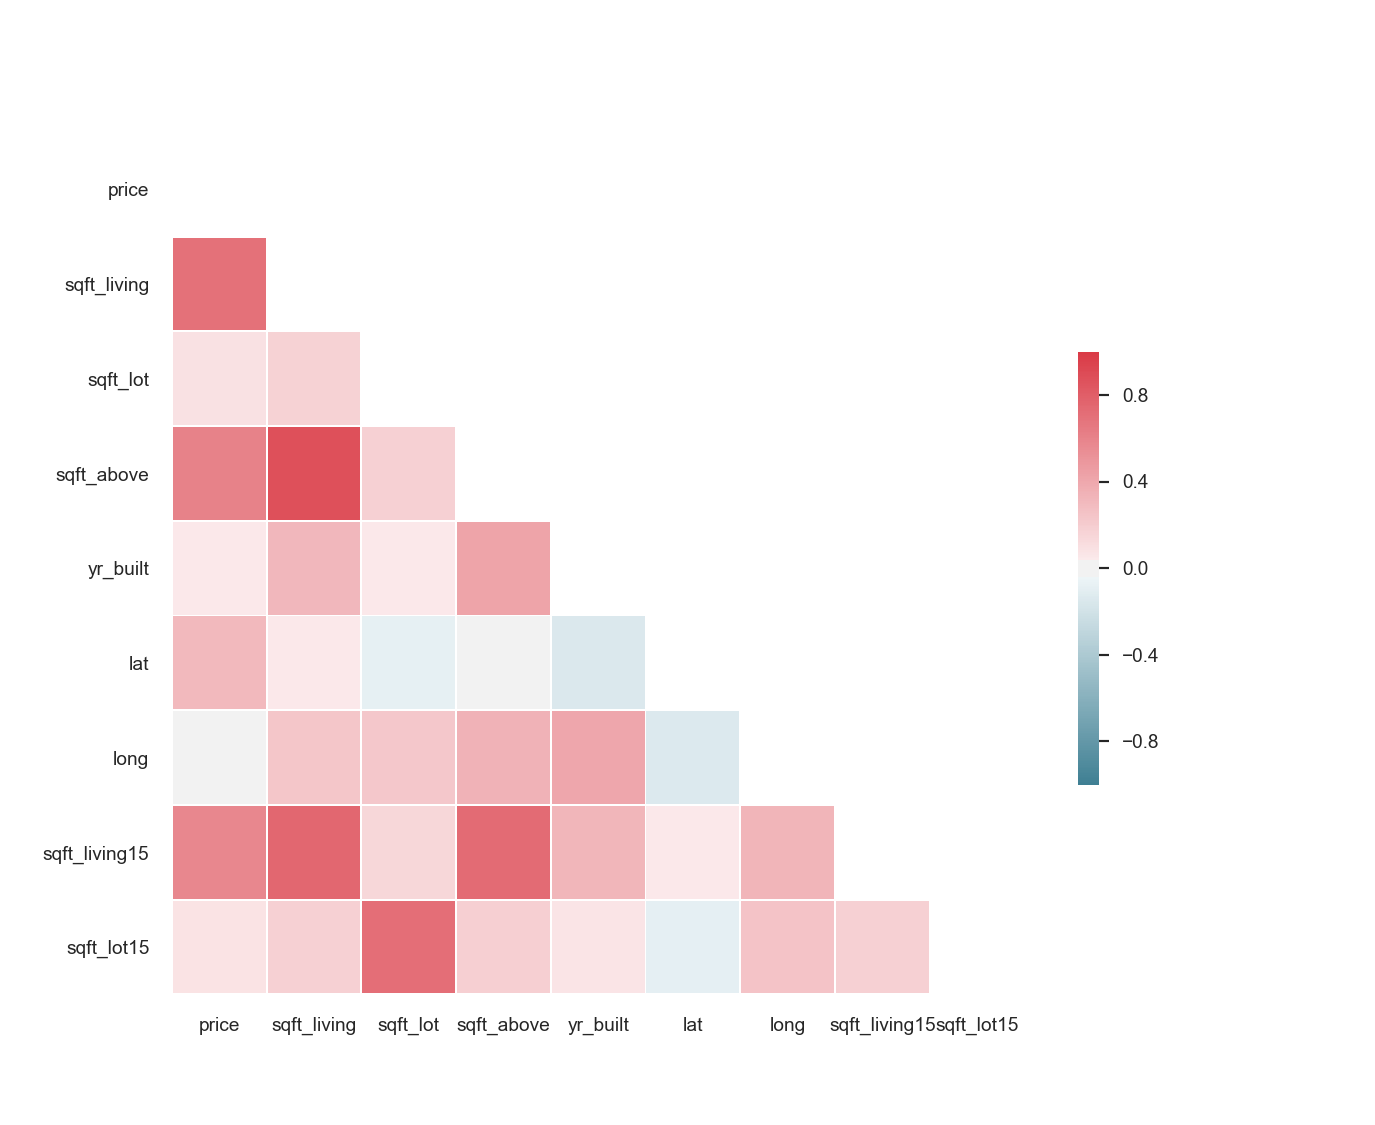

In [32]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [108]:
abs(corr > 0.75)

price  sqft_living  sqft_lot  sqft_above  yr_built    lat  \
price           True        False     False       False     False  False   
sqft_living    False         True     False        True     False  False   
sqft_lot       False        False      True       False     False  False   
sqft_above     False         True     False        True     False  False   
yr_built       False        False     False       False      True  False   
lat            False        False     False       False     False   True   
long           False        False     False       False     False  False   
sqft_living15  False         True     False       False     False  False   
sqft_lot15     False        False     False       False     False  False   

                long  sqft_living15  sqft_lot15  
price          False          False       False  
sqft_living    False           True       False  
sqft_lot       False          False       False  
sqft_above     False          False       False  
yr_built       False          False       False  
lat            False          False       False  
long            True          False       False  
sqft_living15  False           True       False  
sqft_lot15     False          False        True

It seems that some of the variables are strongly correlated. Dropping sqft_living will largely address this.

In [33]:
df.drop('sqft_living', axis = 1, inplace=True)

## One-Hot Encoding of Categorical Variables

I will now create a dataset with dummy variables for each categorical variable created above.

In [34]:
df = pd.get_dummies(df, drop_first = True)

In [35]:
#Removing dots from column names for ease of use later
for col in df.columns:
    new_col = col.replace(".","_")
    df = df.rename(index = str, columns = {col: new_col})
df.columns

Index(['date', 'price', 'sqft_lot', 'sqft_above', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'bedrooms_2',
       ...
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199', 'renovated_1_0'],
      dtype='object', length=117)

# Exploring the Data

## Univariate Distributions

# *Question 1: How are house sale prices distributed?*

### price

Based on the name and the values, price seems to represent the sale price of the house. This is the prediction target. I will visualize the distribution of the price variable and consider possible transformations.

<IPython.core.display.Javascript object>


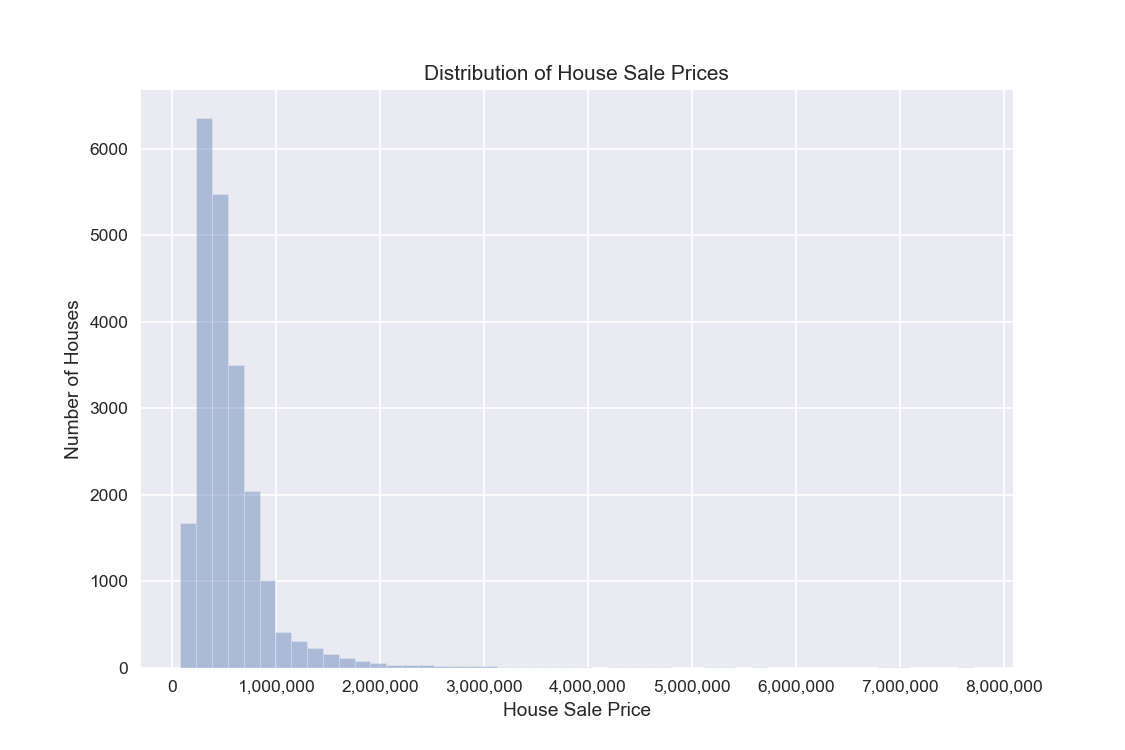

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [36]:
plt.style.use('seaborn')
fix, ax = plt.subplots(figsize=(9,6)) 
ax.set_ylabel("Number of Houses")
ax.set_title("Distribution of House Sale Prices")
ax.get_xaxis().set_major_formatter(
    tck.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.distplot(df['price'], kde = False, axlabel='House Sale Price', label = 'Number of Houses', ax = ax)

As we can see in this histogram, our distribution of house sale prices is positively skewed. Most house sales are for less than \\$1,000,000, but they go up past \\$7,000,000. To address this, I will use a log transformation to improve the normality of the distribution.

<IPython.core.display.Javascript object>


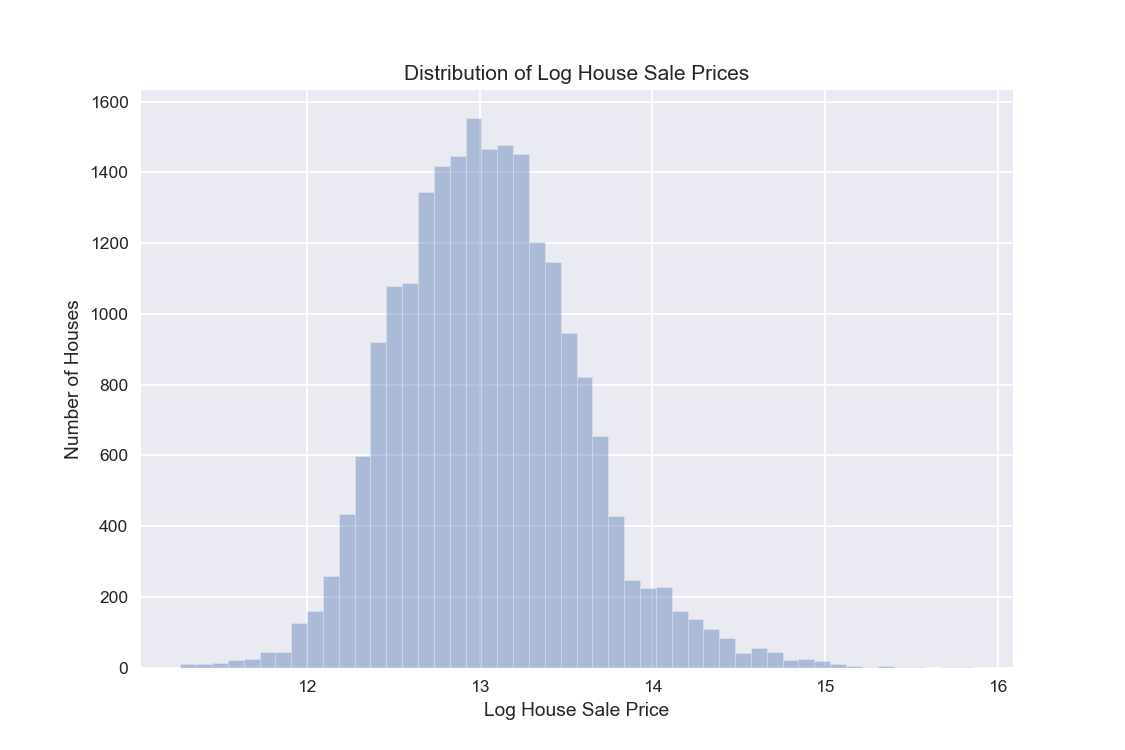

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [37]:
df['log_price'] = np.log(df['price'])
fix, ax = plt.subplots(figsize=(9,6)) 
ax.set_ylabel("Number of Houses")
ax.set_title("Distribution of Log House Sale Prices")
sns.distplot(df['log_price'], kde = False, axlabel='Log House Sale Price', label = 'Number of Houses', ax = ax)

As we can see from the histogram, the distribution of house sale prices is much more normal after applying the log transformation. I will now drop the original price variable, which won't be used.

In [38]:
df = df.drop('price', axis = 1)

# *Question 2: How are the square footage variables distributed?*

### Numeric sqft variables

There are a number of numeric variables that capture various square footage measurements. I will draw histograms of them and determine whether an transformations would be helpful.

<IPython.core.display.Javascript object>


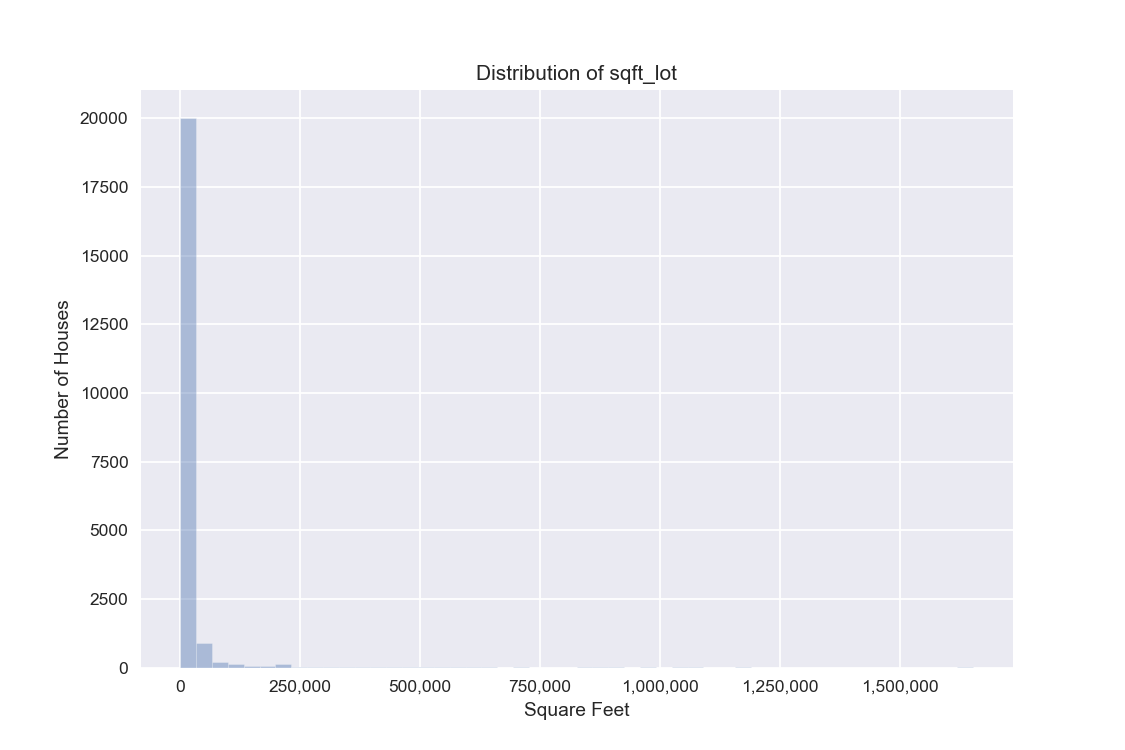

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


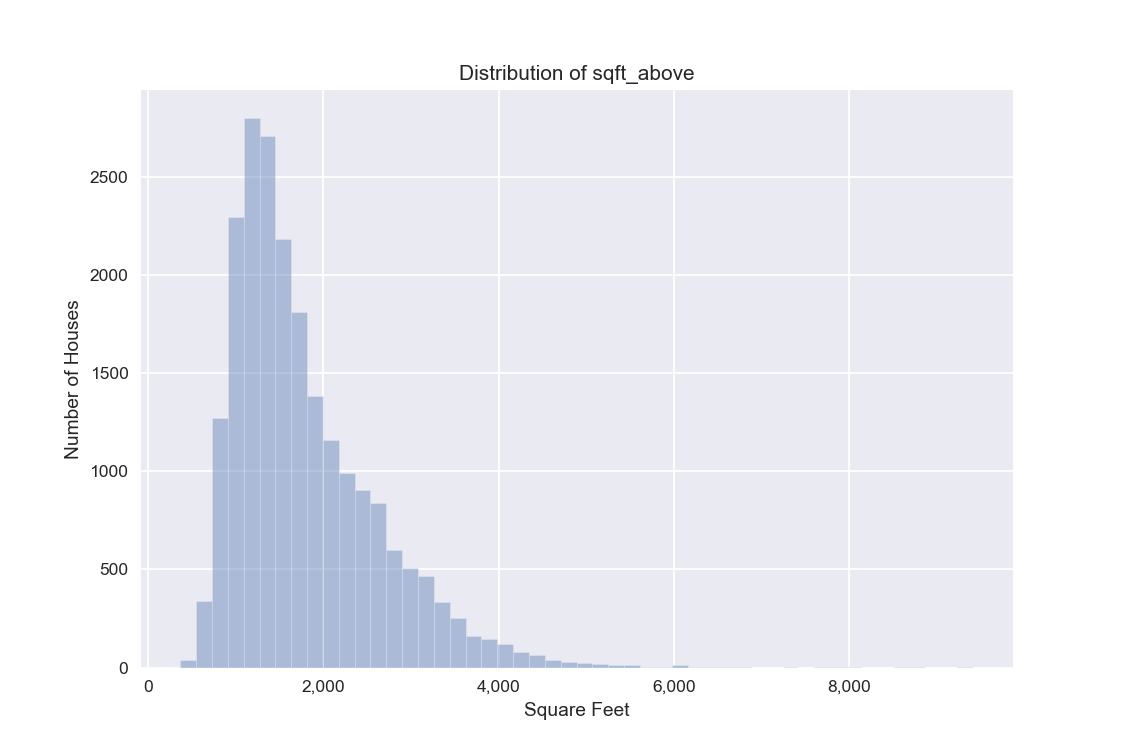

<IPython.core.display.Javascript object>


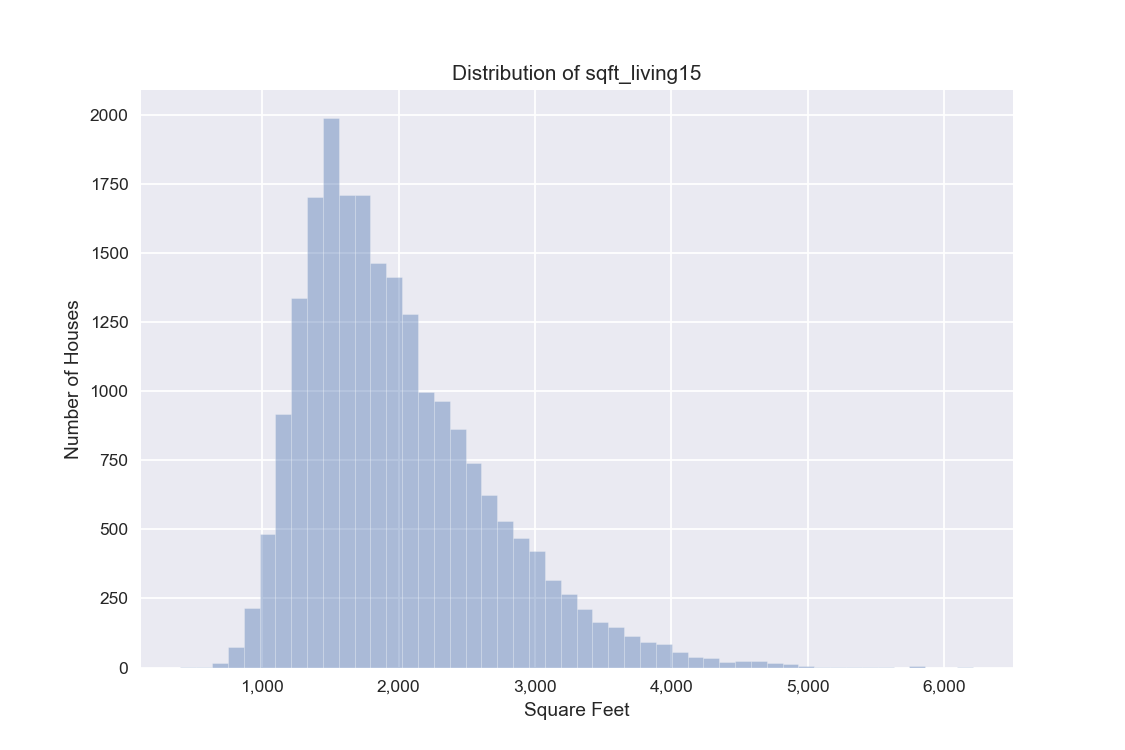

<IPython.core.display.Javascript object>


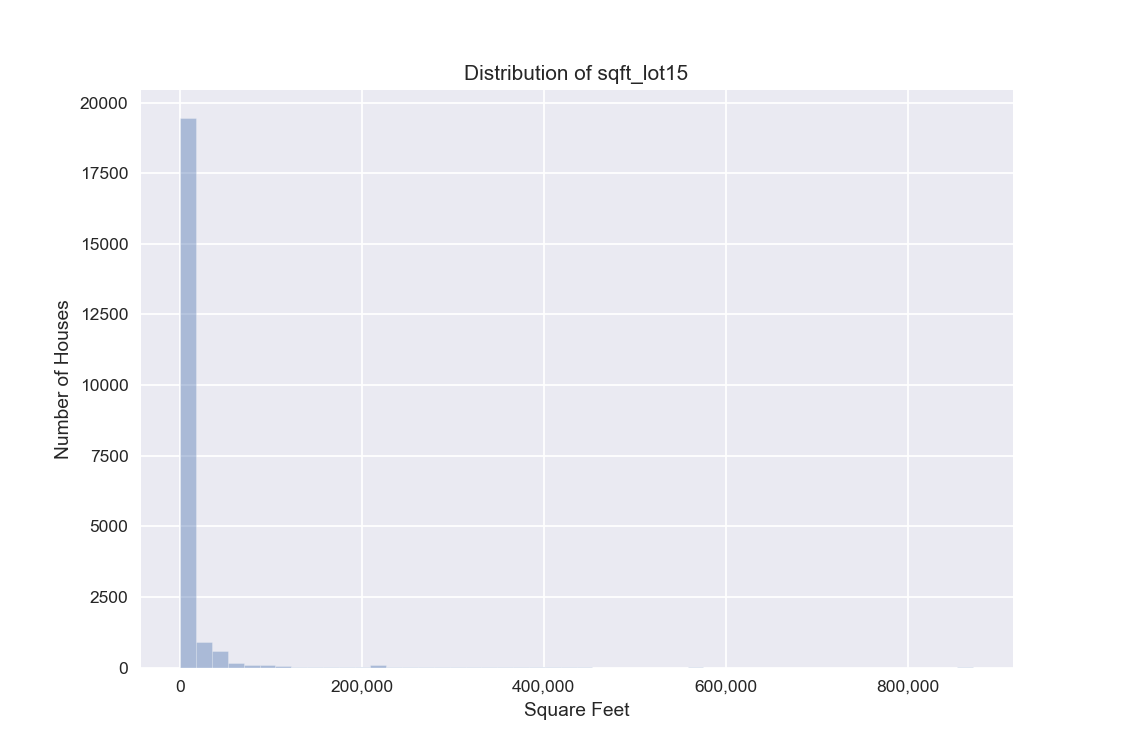

In [39]:
sqft_vars = ['sqft_lot','sqft_above', 'sqft_living15', 'sqft_lot15']
for sqv in sqft_vars:
    fig, ax = plt.subplots(figsize=(9,6)) 
    ax.set_ylabel("Number of Houses")
    ax.set_title("Distribution of " + sqv)
    ax.get_xaxis().set_major_formatter(
        tck.FuncFormatter(lambda x, p: format(int(x), ',')))
    sns.distplot(df[sqv], kde = False, axlabel='Square Feet', label = 'Number of Houses', ax = ax)

All of these variables look like they would benefit from log transformations due to their right skew.

<IPython.core.display.Javascript object>


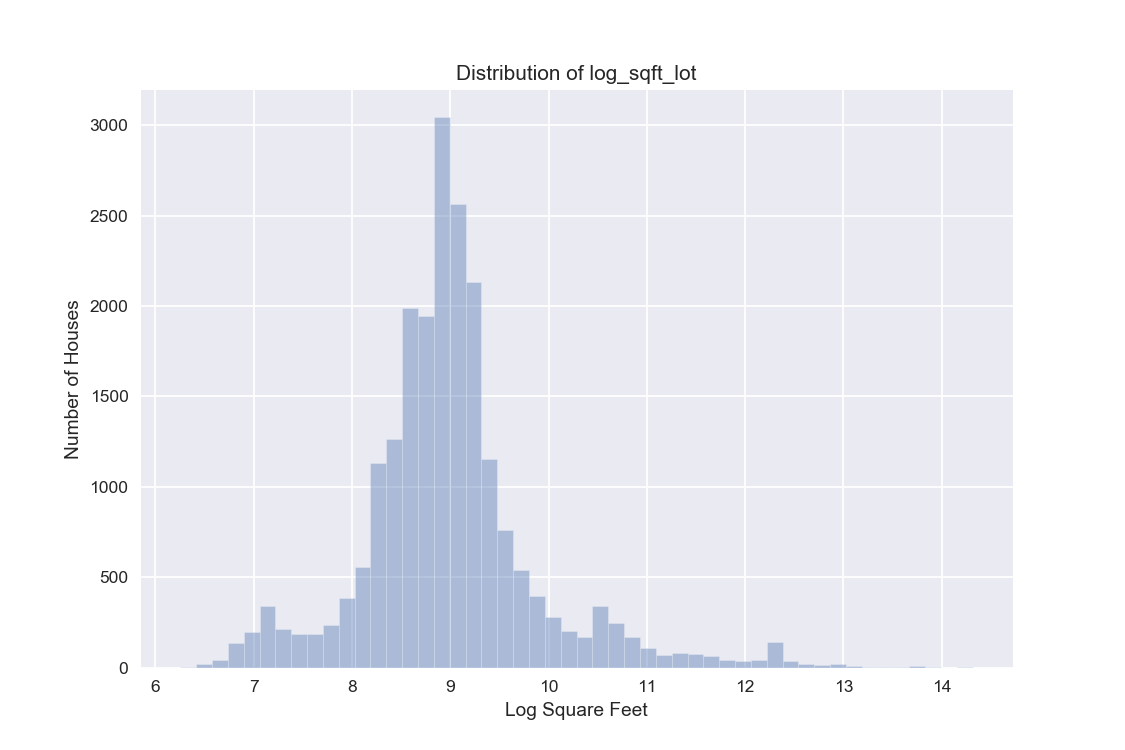

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


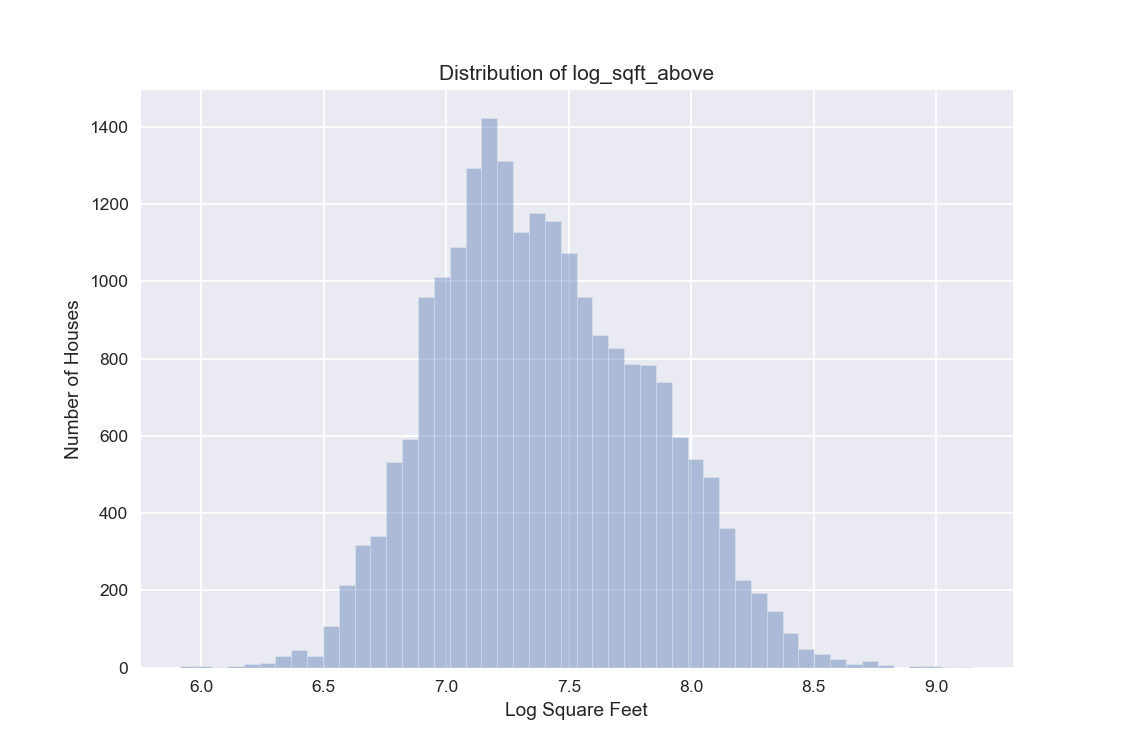

<IPython.core.display.Javascript object>


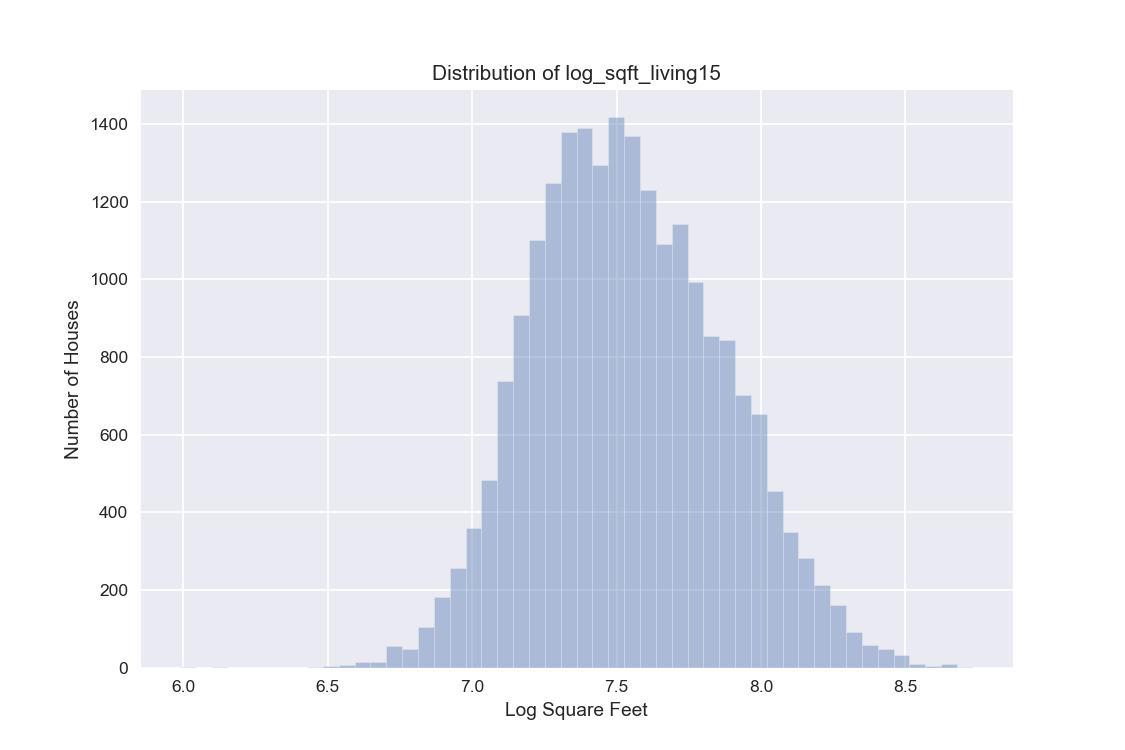

<IPython.core.display.Javascript object>


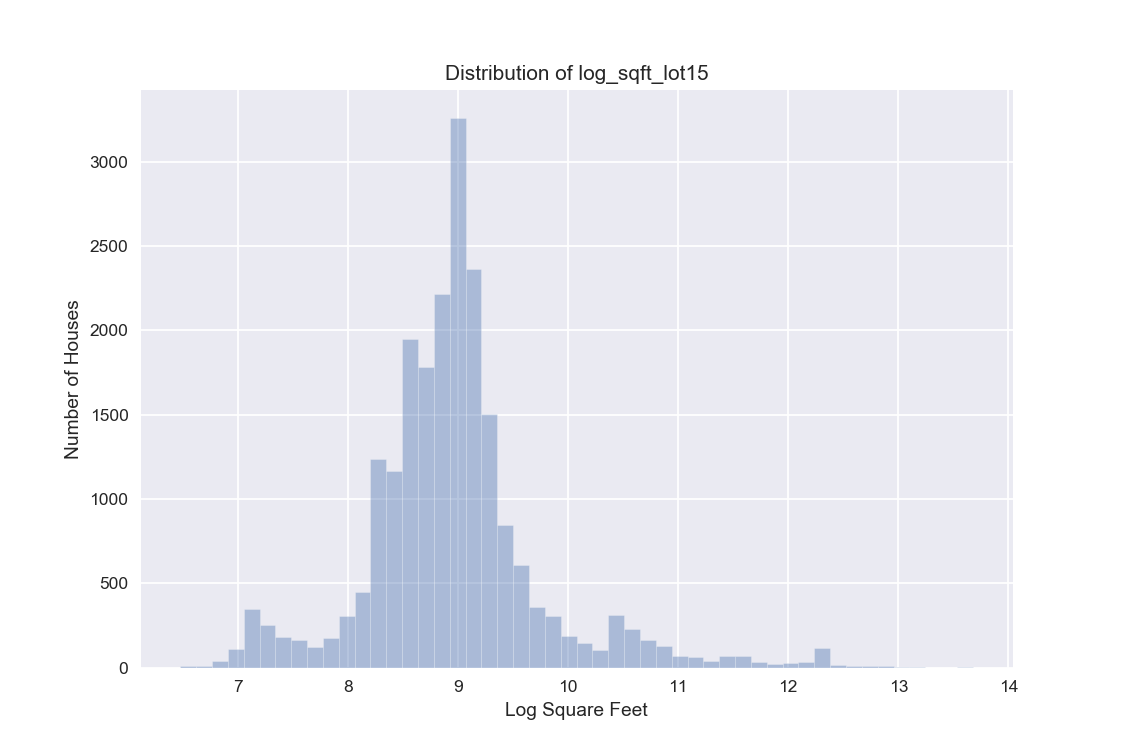

In [40]:
#Take log of each square footage variable and draw a histogram of the new distribution
for sqv in sqft_vars:
    new_var = 'log_' + sqv
    df[new_var] = np.log(df[sqv])
    fig, ax = plt.subplots(figsize=(9,6)) 
    ax.set_ylabel("Number of Houses")
    ax.set_title("Distribution of " + new_var)
    sns.distplot(df[new_var], kde = False, axlabel='Log Square Feet', label = 'Number of Houses', ax = ax)

Looks like it worked! Distributions are much more normal.

In [41]:
df = df.drop(sqft_vars, axis = 1)

### yr_built

<IPython.core.display.Javascript object>


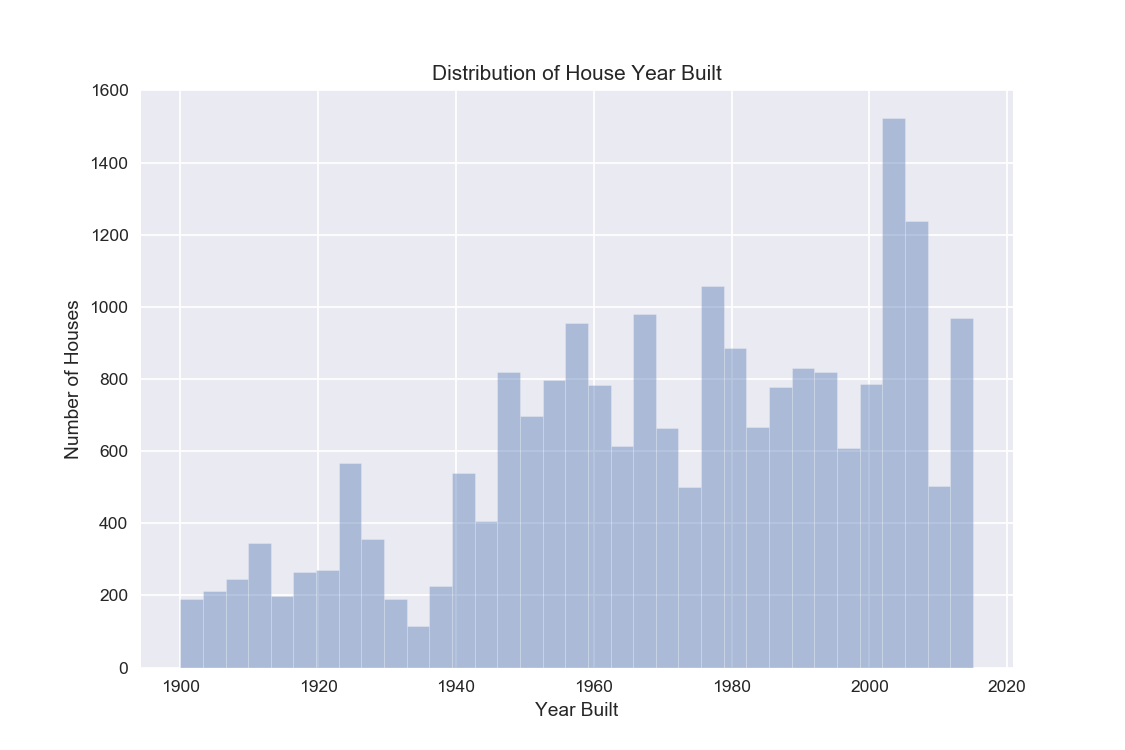

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [42]:
fix, ax = plt.subplots(figsize=(9,6)) 
ax.set_ylabel("Number of Houses")
ax.set_title("Distribution of House Year Built")
sns.distplot(df['yr_built'], kde = False, axlabel='Year Built', label = 'Number of Houses', ax = ax)

### date

<IPython.core.display.Javascript object>


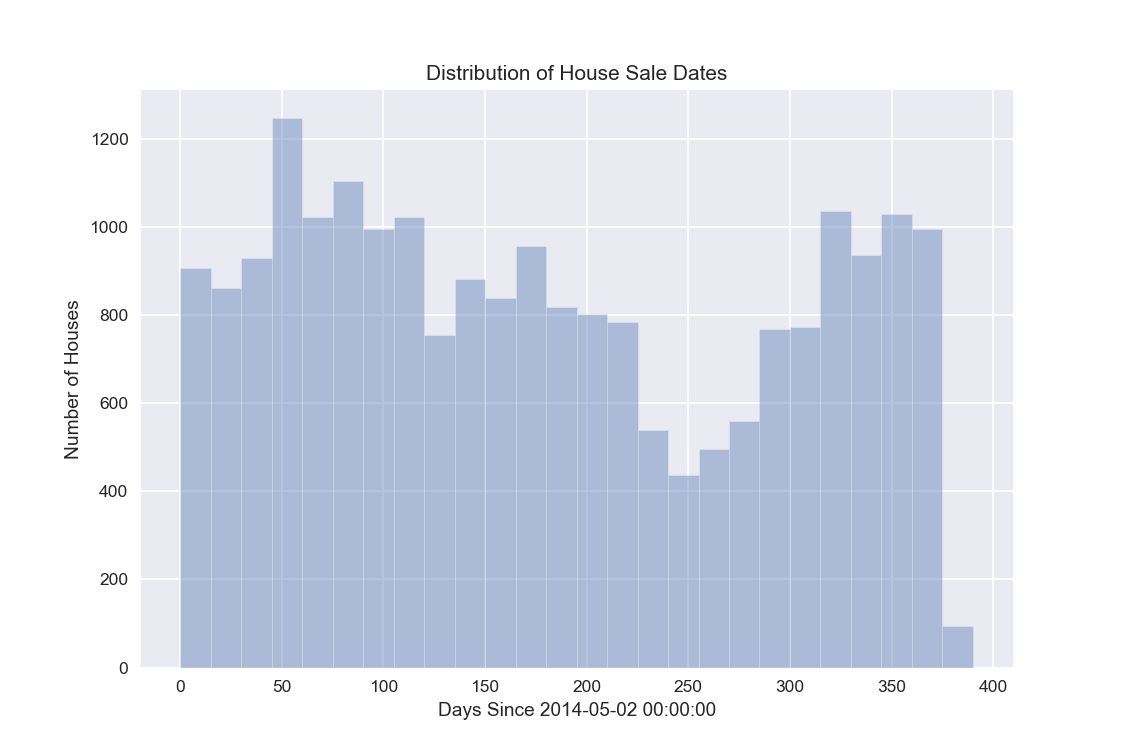

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [43]:
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
fig, ax = plt.subplots(figsize=(9,6)) 
ax.set_ylabel("Number of Houses")
ax.set_title("Distribution of House Sale Dates")
sns.distplot(df['date_delta'], kde = False, axlabel='Days Since ' + str(df['date'].min()), label = 'Number of Houses', ax = ax)

Dates are relatively evenly distributed - no transformation needed

In [44]:
df.drop('date', axis = 1, inplace = True)

## Bivariate Relationships

# *Question 3: How are house sales distributed geographically?*

## Latitude & Longitude

<IPython.core.display.Javascript object>


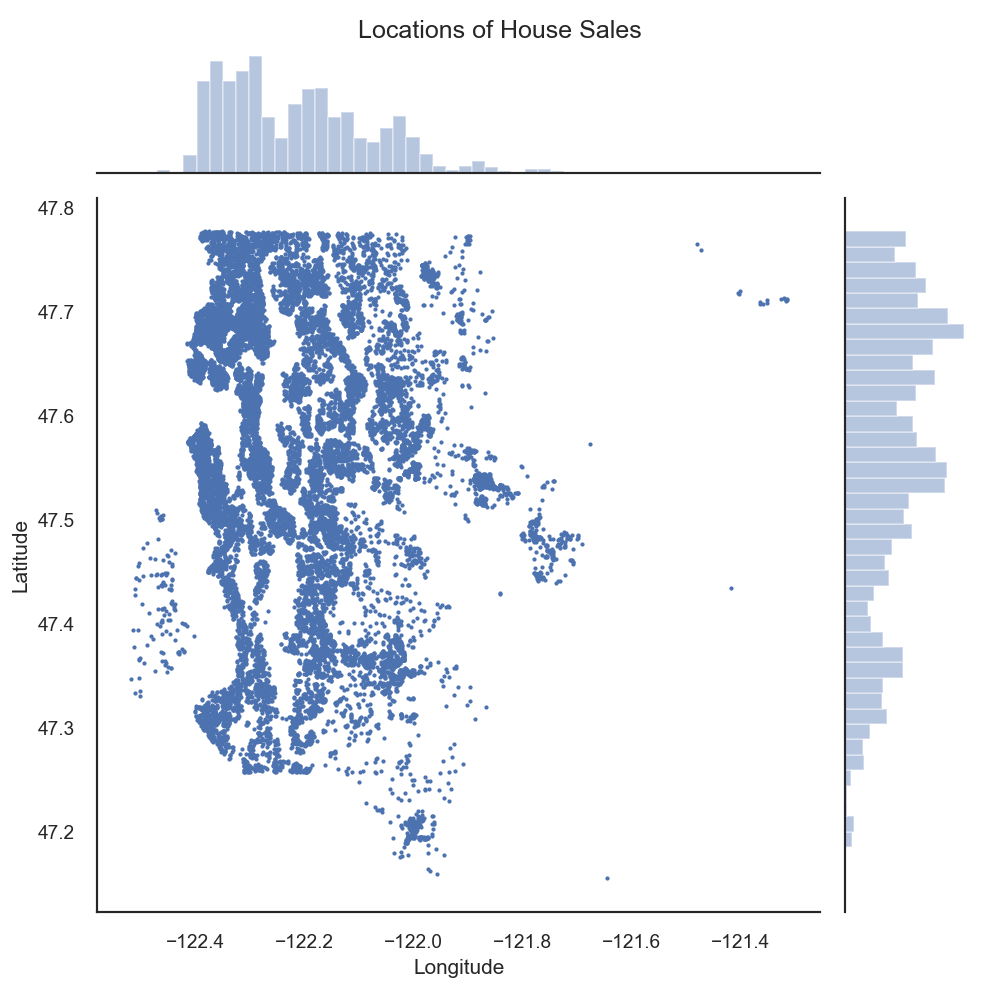

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [45]:
#Graphing latitude and longitude of sales using a scatterplot
sns.set(style="white")
ax = sns.jointplot(x = df['long'], y = df['lat'], s = 2, height = 8)
ax.set_axis_labels(ylabel='Latitude', xlabel='Longitude')
plt.subplots_adjust(top=0.95)
ax.fig.suptitle('Locations of House Sales')
plt.show()

It seems that the houses in this dataset are are concentrated in multiple different neighborhoods. Some neighborhoods seem to be much denser than others as well. The neighborhoods seem to be close, but not exactly adjacent, because there are areas with zero house sales between concentrated areas. 

# *Question 4: Where are the more expensive houses located?*

<IPython.core.display.Javascript object>


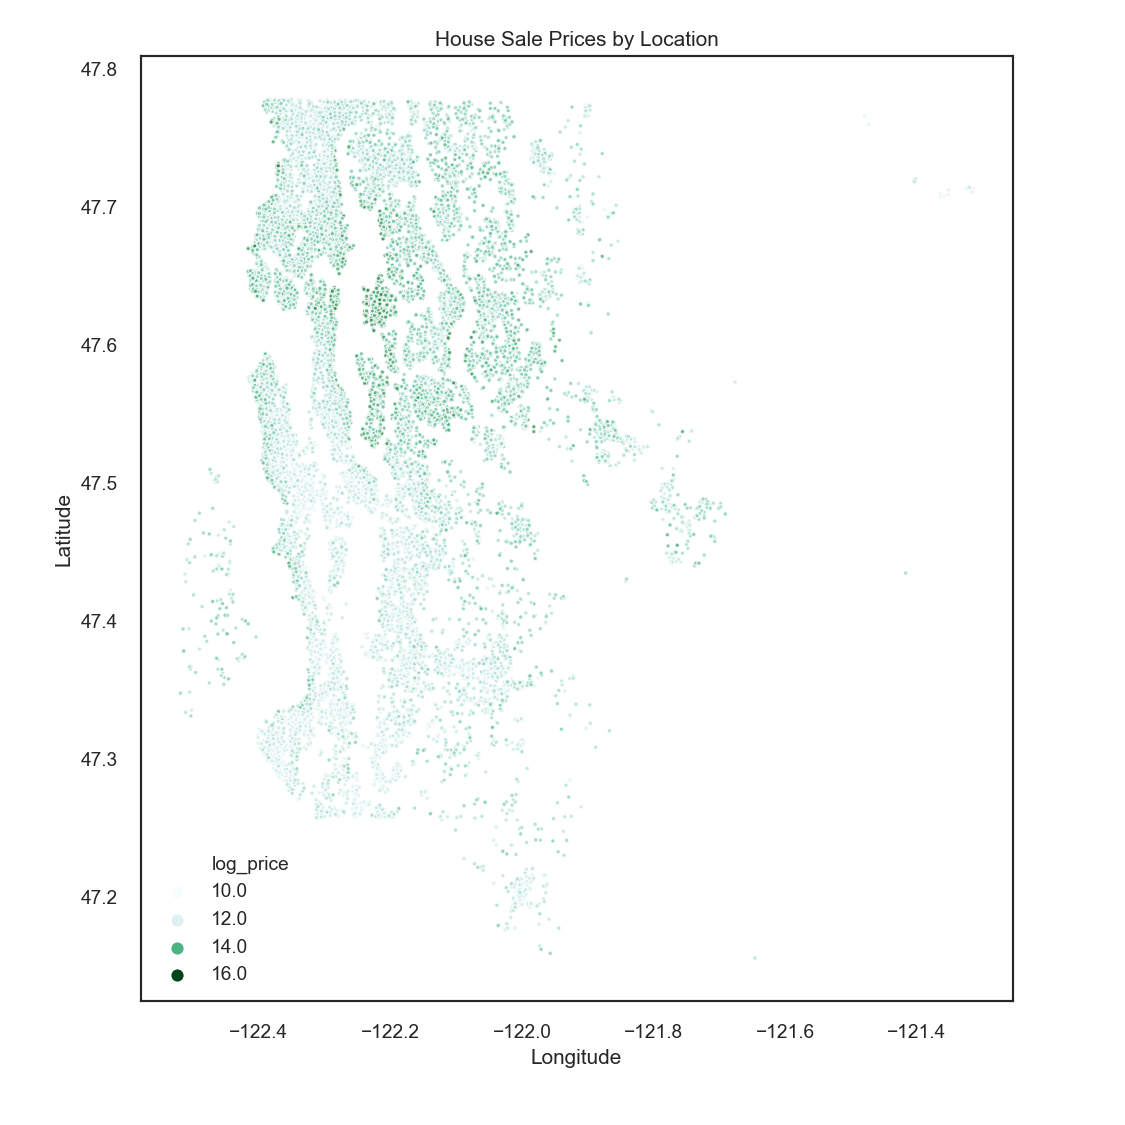

In [154]:
#Graphing sale prices by location
fig, ax = plt.subplots(figsize=(9,9)) 
sns.scatterplot(x = 'long', y = 'lat', data = df,
                hue = 'log_price', palette='BuGn', alpha = .7,
                s = 6, ax = ax )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.subplots_adjust(top=0.95)
ax.set_title('House Sale Prices by Location')
plt.show()

The most expensive houses seem to be located toward the middle of King County and on the waterfront to the west.

# *Question 5: Which numeric variables are most strongly correlated with sale price?*

Let's explore some bivariate relationships among out numeric variables. Of particular interest will be bivariate relationships with our outcome variable, log_price.

<IPython.core.display.Javascript object>


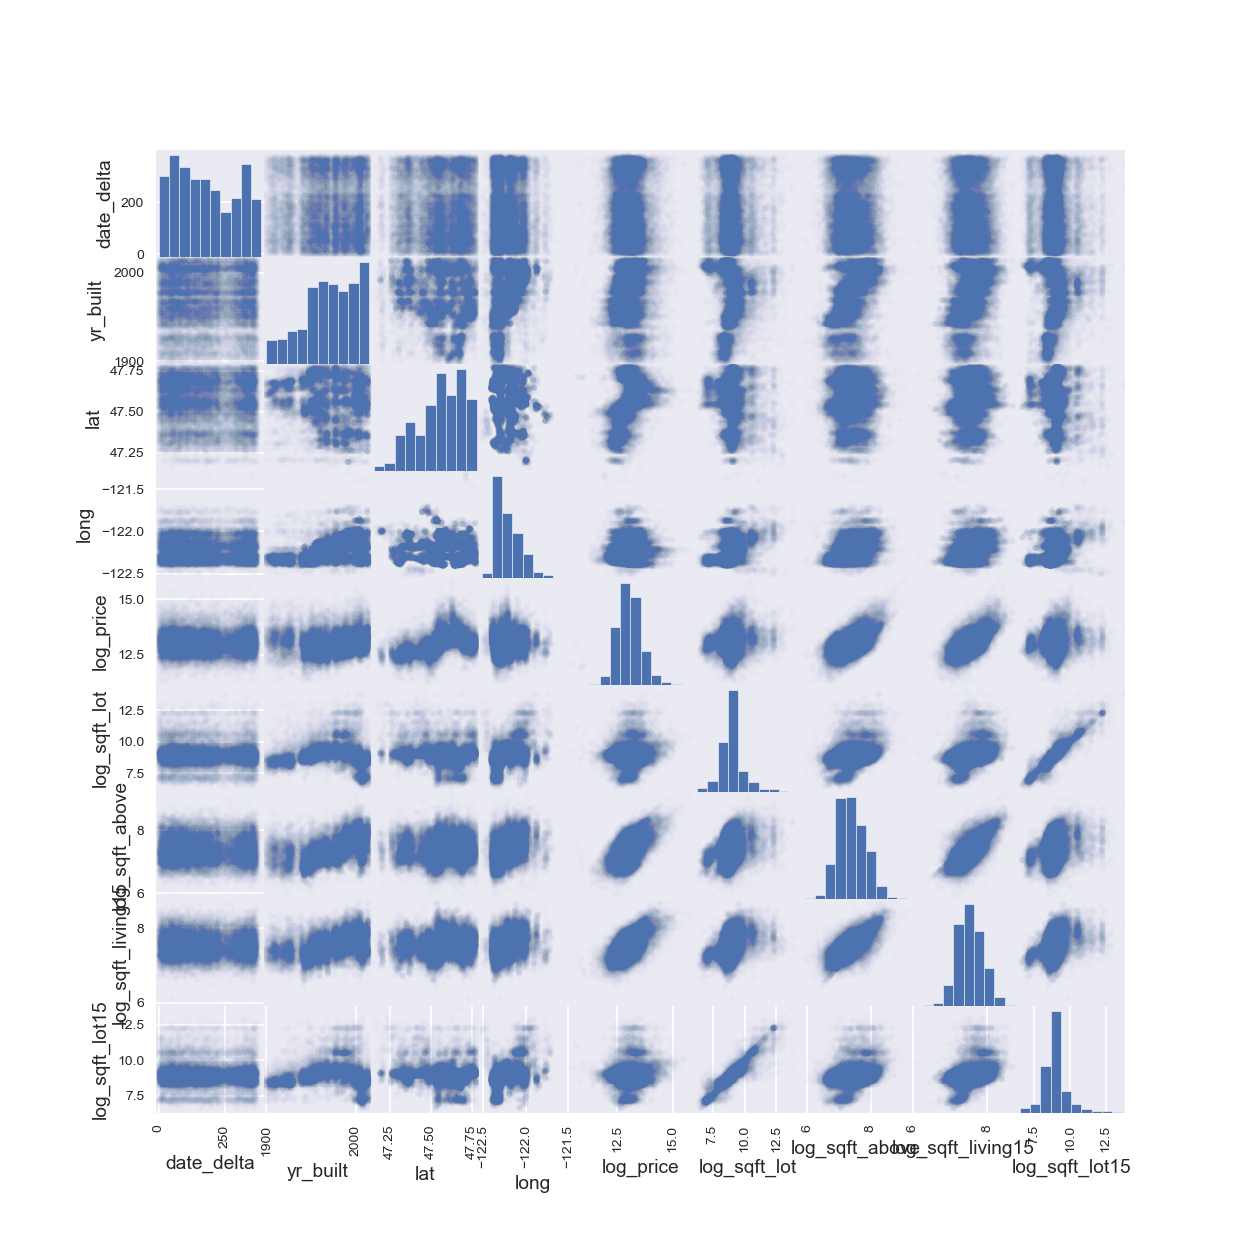

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187A02814A8>,
      dtype=object)

In [51]:
plt.style.use('seaborn')
pd.plotting.scatter_matrix(df[['date_delta','yr_built', 'lat', 'long','log_price',
                               'log_sqft_lot', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15']],
                               figsize=(10,10), alpha = 0.01 )

It is difficult to see any linear relationships given the density of the points, but the strongest bivariate relationships seem to be with the square footage variables 'log_sqft_above' and 'log_sqft_living15'.

# Model the Data

## Build an initial model using statsmodels

For my initial model, I will perform multiple regression using all of the predictors that I've retained.

In [52]:
outcome = df['log_price']
predictors = df.drop('log_price', axis = 1)

In [53]:
pred_sum = "+".join(predictors.columns)
formula = "log_price~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1443.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:17:55   Log-Likelihood:                 6686.0
No. Observations:               21597   AIC:                        -1.314e+04
Df Residuals:                   21480   BIC:                        -1.220e+04
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -70.2524      6.884    -10.205      0.000     -83.746     -56.759
yr_built              0.0001   7.84e-05      1.613      0.107   -2.72e-05       0.000
lat                   0.5034      0.070      7.153      0.000       0.365       0.641
long                 -0.4363      0.051     -8.553      0.000      -0.536      -0.336
bedrooms_2           -0.0139      0.014     -1.030      0.303      -0.040       0.013
bedrooms_3           -0.0288      0.014     -2.111      0.035      -0.056      -0.002
bedrooms_4           -0.0248      0.014     -1.769      0.077      -0.052       0.003
bedrooms_5           -0.0442      0.015     -2.992      0.003      -0.073      -0.015
bedrooms_6           -0.0732      0.018     -4.075      0.000      -0.108      -0.038
bedrooms_7           -0.1601      0.027     -5.860      0.000      -0.214      -0.107
bathrooms_1_0         0.1509      0.089      1.690      0.091      -0.024       0.326
bathrooms_2_0         0.1746      0.089      1.955      0.051      -0.000       0.350
bathrooms_3_0         0.2031      0.089      2.270      0.023       0.028       0.378
bathrooms_4_0         0.2260      0.090      2.522      0.012       0.050       0.402
bathrooms_5_0         0.3230      0.093      3.483      0.000       0.141       0.505
bathrooms_6_0         0.4310      0.097      4.439      0.000       0.241       0.621
bathrooms_7_0         0.1169      0.156      0.752      0.452      -0.188       0.422
bathrooms_8_0         0.3618      0.128      2.833      0.005       0.111       0.612
floors_1_5            0.0027      0.005      0.544      0.586      -0.007       0.013
floors_2_0           -0.0071      0.004     -1.664      0.096      -0.015       0.001
floors_2_5            0.0140      0.015      0.938      0.348      -0.015       0.043
floors_3_0           -0.0782      0.009     -8.308      0.000      -0.097      -0.060
waterfront_1_0        0.4412      0.018     23.970      0.000       0.405       0.477
view_1_0              0.1039      0.010     10.237      0.000       0.084       0.124
view_2_0              0.0982      0.006     15.836      0.000       0.086       0.110
view_3_0              0.1709      0.008     20.203      0.000       0.154       0.187
view_4_0              0.2910      0.013     22.765      0.000       0.266       0.316
condition_2           0.1546      0.036      4.293      0.000       0.084       0.225
condition_3           0.2944      0.034      8.782      0.000       0.229       0.360
condition_4           0.3388      0.034     10.100      0.000       0.273       0.405
condition_5           0.4135      0.034     12.250      0.000       0.347       0.480
grade_6               0.0666      0.012      5.570      0.000       0.043       0.090
grade_7               0.1400      0.012     11.619      0.000       0.116

The initial model is encouraging. I have an R-squared of 0.886, meaning that I am able to explain over 88% of the variance in home sale prices in this dataset. As expected, the square footage variables seem to be very powerful here, with large t statistics and small p-values. However, given the large number of predictors included here, there is a high chance that I am overfitting my data. This means that the model might fare poorly for predicting sale prices for houses not in this dataset. 

There are three issues evident in the model from the output above:
- There is evidence of multicollinearity due to the high condition number
- There are multiple features with high p values. 
- There is evidence of non-normality in the residuals due to high kurtosis

## Multicollinearity

I will explore which variables might have high multicollinearity by using the Variance Inflation Factor, a metric associated with each predictor that describes how correlated it is with the other predictors. VIF over 5 is generally considered high.

In [54]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

In [55]:
vif.sort_values('VIF Factor', ascending=False).head(10)

VIF Factor           features
1    6.264433e+06                lat
2    6.191835e+06               long
0    1.614428e+04           yr_built
10   3.485271e+03      bathrooms_2_0
112  1.879996e+03     log_sqft_above
113  1.711062e+03  log_sqft_living15
9    9.883685e+02      bathrooms_1_0
114  8.627191e+02     log_sqft_lot15
111  7.204813e+02       log_sqft_lot
11   6.375639e+02      bathrooms_3_0

Given that VIF over 5 is considered high, these are some huge numbers! I will start by dropping the highest one for 'lat' and see if that helps.

In [56]:
predictors = df.drop(['log_price', 'lat'], axis = 1)
pred_sum = "+".join(predictors.columns)
formula = "log_price~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1452.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:18:35   Log-Likelihood:                 6660.3
No. Observations:               21597   AIC:                        -1.309e+04
Df Residuals:                   21481   BIC:                        -1.216e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -49.4049      6.244     -7.912      0.000     -61.644     -37.166
yr_built              0.0001   7.85e-05      1.597      0.110   -2.85e-05       0.000
long                 -0.4606      0.051     -9.040      0.000      -0.560      -0.361
bedrooms_2           -0.0140      0.014     -1.037      0.300      -0.041       0.012
bedrooms_3           -0.0294      0.014     -2.151      0.031      -0.056      -0.003
bedrooms_4           -0.0253      0.014     -1.807      0.071      -0.053       0.002
bedrooms_5           -0.0450      0.015     -3.045      0.002      -0.074      -0.016
bedrooms_6           -0.0736      0.018     -4.094      0.000      -0.109      -0.038
bedrooms_7           -0.1610      0.027     -5.885      0.000      -0.215      -0.107
bathrooms_1_0         0.1463      0.089      1.637      0.102      -0.029       0.322
bathrooms_2_0         0.1704      0.089      1.905      0.057      -0.005       0.346
bathrooms_3_0         0.1987      0.090      2.219      0.027       0.023       0.374
bathrooms_4_0         0.2210      0.090      2.464      0.014       0.045       0.397
bathrooms_5_0         0.3205      0.093      3.451      0.001       0.138       0.502
bathrooms_6_0         0.4265      0.097      4.388      0.000       0.236       0.617
bathrooms_7_0         0.1143      0.156      0.734      0.463      -0.191       0.420
bathrooms_8_0         0.3574      0.128      2.796      0.005       0.107       0.608
floors_1_5            0.0023      0.005      0.460      0.646      -0.008       0.012
floors_2_0           -0.0083      0.004     -1.945      0.052      -0.017    6.56e-05
floors_2_5            0.0128      0.015      0.857      0.391      -0.016       0.042
floors_3_0           -0.0800      0.009     -8.490      0.000      -0.098      -0.062
waterfront_1_0        0.4389      0.018     23.823      0.000       0.403       0.475
view_1_0              0.1036      0.010     10.198      0.000       0.084       0.124
view_2_0              0.0977      0.006     15.741      0.000       0.086       0.110
view_3_0              0.1699      0.008     20.062      0.000       0.153       0.186
view_4_0              0.2901      0.013     22.671      0.000       0.265       0.315
condition_2           0.1529      0.036      4.243      0.000       0.082       0.224
condition_3           0.2933      0.034      8.739      0.000       0.228       0.359
condition_4           0.3369      0.034     10.031      0.000       0.271       0.403
condition_5           0.4118      0.034     12.186      0.000       0.346       0.478
grade_6               0.0664      0.012      5.540      0.000       0.043       0.090
grade_7               0.1395      0.012     11.567      0.000       0.116       0.163
grade_8               0.2233      0.013     17.504      0.000       0.198

The condition number is still quite high. I will need to drop a lot more variables to get it somewhere reasonable. I will do this by systematically removing variables with the highest VIF until the VIF of all features is below 5.

In [57]:
def calculate_vif_(X, thresh=5.0):
    """
    Takes a set of predictors and returns a subset of predictors with VIF below a given threshold. 
    Predictors are dropped iteratively, with the highest VIF predictor dropped in each iteration. 
    
    X -- predictor set
    thresh -- VIF value used to determine when to stop dropping variables
    """
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [71]:
predictors = calculate_vif_(df.drop(['log_price'], axis = 1), thresh = 10)

dropping 'lat' at index: 1
dropping 'long' at index: 1
dropping 'yr_built' at index: 0
dropping 'log_sqft_above' at index: 109
dropping 'log_sqft_living15' at index: 109
dropping 'log_sqft_lot15' at index: 109
dropping 'bathrooms_2_0' at index: 7
dropping 'condition_3' at index: 23
dropping 'log_sqft_lot' at index: 106
dropping 'bedrooms_3' at index: 1
dropping 'sqft_basement_0' at index: 30
dropping 'grade_7' at index: 25
Remaining variables:
Index(['bedrooms_2', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bathrooms_1_0', 'bathrooms_3_0', 'bathrooms_4_0', 'bathrooms_5_0',
       'bathrooms_6_0',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'renovated_1_0', 'date_delta'],
      dtype='object', length=104)


In [72]:
pred_sum = "+".join(predictors.columns)
formula = "log_price~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1073.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:10:56   Log-Likelihood:                 2895.2
No. Observations:               21597   AIC:                            -5580.
Df Residuals:                   21492   BIC:                            -4742.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.3090      0.012   1036.164      0.000      12.286      12.332
bedrooms_2         -0.0640      0.005    -12.737      0.000      -0.074      -0.054
bedrooms_4          0.0700      0.004     19.228      0.000       0.063       0.077
bedrooms_5          0.0796      0.006     12.634      0.000       0.067       0.092
bedrooms_6          0.0879      0.014      6.485      0.000       0.061       0.115
bedrooms_7          0.0267      0.028      0.957      0.339      -0.028       0.081
bathrooms_1_0      -0.1021      0.005    -20.527      0.000      -0.112      -0.092
bathrooms_3_0       0.0657      0.005     13.158      0.000       0.056       0.075
bathrooms_4_0       0.1149      0.008     15.171      0.000       0.100       0.130
bathrooms_5_0       0.2670      0.029      9.094      0.000       0.209       0.325
bathrooms_6_0       0.4650      0.045     10.361      0.000       0.377       0.553
bathrooms_7_0       0.0356      0.152      0.234      0.815      -0.262       0.333
bathrooms_8_0       0.5813      0.108      5.365      0.000       0.369       0.794
floors_1_5          0.0768      0.006     13.509      0.000       0.066       0.088
floors_2_0          0.0520      0.004     11.888      0.000       0.043       0.061
floors_2_5          0.1088      0.017      6.222      0.000       0.075       0.143
floors_3_0         -0.1429      0.010    -14.065      0.000      -0.163      -0.123
waterfront_1_0      0.4425      0.022     20.201      0.000       0.400       0.485
view_1_0            0.1603      0.012     13.318      0.000       0.137       0.184
view_2_0            0.1518      0.007     20.774      0.000       0.138       0.166
view_3_0            0.2355      0.010     23.570      0.000       0.216       0.255
view_4_0            0.3645      0.015     24.054      0.000       0.335       0.394
condition_2        -0.1359      0.017     -8.219      0.000      -0.168      -0.103
condition_4         0.0536      0.004     14.674      0.000       0.046       0.061
condition_5         0.1135      0.006     19.584      0.000       0.102       0.125
grade_6            -0.1261      0.006    -21.830      0.000      -0.137      -0.115
grade_8             0.1792      0.004     44.858      0.000       0.171       0.187
grade_9             0.4085      0.006     72.057      0.000       0.397       0.420
grade_10            0.5856      0.008     72.812      0.000       0.570       0.601
grade_11            0.8151      0.012     68.914      0.000       0.792       0.838
sqft_basement_1    -0.0165      0.005     -3.085      0.002      -0.027      -0.006
sqft_basement_2     0.0374      0.006      6.788      0.000       0.027       0.048
sqft_basement_3     0.0527      0.006      9.529      0.000       0.042       0.064
sqft_basement_4     0.0954      0.006     15.758      0.000

The condition number is still large, but much smaller than before. However, the R-squared has dropped somewhat, to 0.838. I think this is an acceptable trade-off, as I will be able to have more confidence in the interpretation of the coefficients that I will do later on.

In [60]:
#saving feature set with high VIF features dropped
pred_vif = predictors

## Predictors with Low P-Values

Some of the predictors in the model add little predictive power. I will remove these variables systematically, as I did using VIF, by removing features one at a time based on their p-values. I will re-run the model between each iteration to ensure that I am getting the predictors with the least predictive power at each step.

In [61]:
def calculate_pval_(X, dat, thresh=0.05):
    """
    Takes a set of predictors and returns a subset of predictors with p-values below a given threshold. 
    Predictors are dropped iteratively, with the highest p-value predictor dropped in each iteration. 
    
    X -- predictor set
    dat -- full data set, including target
    thresh -- p-value used to determine when to stop dropping variables
    """
    curr_X = X
    dropped = True
    while dropped:
        dropped = False
        
        pred_sum = "+".join(curr_X.columns)
        formula = "log_price~" + pred_sum
        model = ols(formula= formula, data=dat).fit()
        
        pval = model.pvalues
        maxloc = pval[pval == max(pval)].index[0]
        
        if max(pval) > thresh:
            print('dropping ' + maxloc + ' with p-value ' + str(max(pval)))
            curr_X = curr_X.drop(maxloc, axis = 1)
            dropped = True

    print('Remaining variables:')
    print(curr_X.columns)
    return curr_X

In [62]:
predictors = calculate_pval_(pred_vif, df)

dropping zipcode_98003 with p-value 0.8993689114337232
dropping bathrooms_7_0 with p-value 0.8146608305253453
dropping bedrooms_7 with p-value 0.32523652774484346
dropping zipcode_98198 with p-value 0.07172856642395826
Remaining variables:
Index(['bedrooms_2', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1_0',
       'bathrooms_3_0', 'bathrooms_4_0', 'bathrooms_5_0', 'bathrooms_6_0',
       'bathrooms_8_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0', 'view_4_0',
       'condition_2', 'condition_4', 'condition_5', 'grade_6', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'sqft_basement_1', 'sqft_basement_2',
       'sqft_basement_3', 'sqft_basement_4', 'zipcode_98002', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98

In [63]:
pred_sum = "+".join(predictors.columns)
formula = "log_price~" + pred_sum
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1116.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:26:56   Log-Likelihood:                 2893.0
No. Observations:               21597   AIC:                            -5584.
Df Residuals:                   21496   BIC:                            -4778.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.3183      0.008   1519.746      0.000      12.302      12.334
bedrooms_2         -0.0639      0.005    -12.727      0.000      -0.074      -0.054
bedrooms_4          0.0697      0.004     19.215      0.000       0.063       0.077
bedrooms_5          0.0792      0.006     12.608      0.000       0.067       0.091
bedrooms_6          0.0870      0.014      6.433      0.000       0.061       0.114
bathrooms_1_0      -0.1021      0.005    -20.526      0.000      -0.112      -0.092
bathrooms_3_0       0.0660      0.005     13.250      0.000       0.056       0.076
bathrooms_4_0       0.1157      0.008     15.374      0.000       0.101       0.130
bathrooms_5_0       0.2691      0.029      9.197      0.000       0.212       0.326
bathrooms_6_0       0.4686      0.045     10.486      0.000       0.381       0.556
bathrooms_8_0       0.5945      0.107      5.536      0.000       0.384       0.805
floors_1_5          0.0770      0.006     13.547      0.000       0.066       0.088
floors_2_0          0.0520      0.004     11.895      0.000       0.043       0.061
floors_2_5          0.1091      0.017      6.242      0.000       0.075       0.143
floors_3_0         -0.1429      0.010    -14.064      0.000      -0.163      -0.123
waterfront_1_0      0.4432      0.022     20.252      0.000       0.400       0.486
view_1_0            0.1613      0.012     13.416      0.000       0.138       0.185
view_2_0            0.1522      0.007     20.835      0.000       0.138       0.167
view_3_0            0.2360      0.010     23.640      0.000       0.216       0.256
view_4_0            0.3652      0.015     24.105      0.000       0.335       0.395
condition_2        -0.1358      0.017     -8.215      0.000      -0.168      -0.103
condition_4         0.0536      0.004     14.686      0.000       0.046       0.061
condition_5         0.1135      0.006     19.583      0.000       0.102       0.125
grade_6            -0.1260      0.006    -21.815      0.000      -0.137      -0.115
grade_8             0.1790      0.004     44.852      0.000       0.171       0.187
grade_9             0.4083      0.006     72.046      0.000       0.397       0.419
grade_10            0.5851      0.008     72.821      0.000       0.569       0.601
grade_11            0.8145      0.012     69.079      0.000       0.791       0.838
sqft_basement_1    -0.0165      0.005     -3.089      0.002      -0.027      -0.006
sqft_basement_2     0.0375      0.006      6.799      0.000       0.027       0.048
sqft_basement_3     0.0527      0.006      9.528      0.000       0.042       0.064
sqft_basement_4     0.0958      0.006     15.853      0.000       0.084       0.108
zipcode_98002      -0.0725      0.017     -4.352      0.000      -0.105      -0.040
zipcode_98004       1.1312      0.014     80.430      0.000

We have successfully dropped weak predictors, and our R-squared is largely unchanged.

## Non-Normality of Residuals

The high kurtosis remains and the Jarque-Bera test remains significant, suggesting that our residuals are not normally distributed. I will explore this further by drawing a Q-Q Plot of the residuals.

<IPython.core.display.Javascript object>


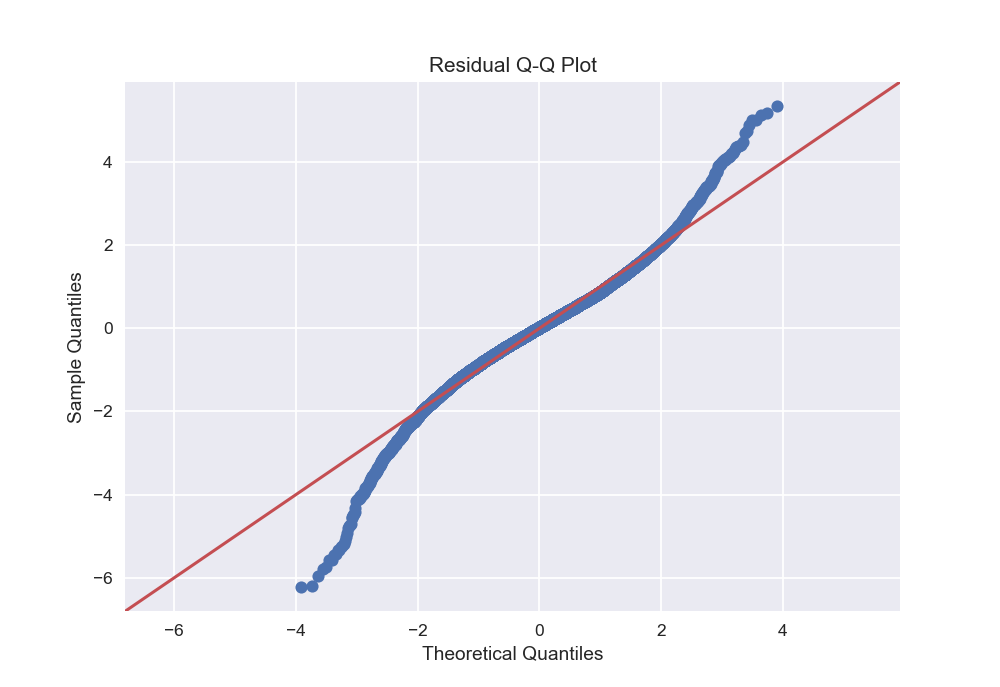

In [64]:
residuals = model.resid
fig = smapi.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title('Residual Q-Q Plot')
fig.show()

There seem to be some substantial outliers in our sample, with residuals that are far larger in magnitude than would be expected from a normal distribution. This may be due to issues with the model or because of the nature of house sales, where factors other than those included in our dataset can influence sale prices substantially. I will first check to see if this kurtosis is a problem in the original log_price outcome variable.

In [65]:
print(kurtosis(outcome))

0.6906107356267648


The outcome measure is only slightly leptokurtic, so transformations of this variable are unlikely to help much. Let's next explore some additional residual plots to see if there is any evidence of heteroscedasticity.

<IPython.core.display.Javascript object>


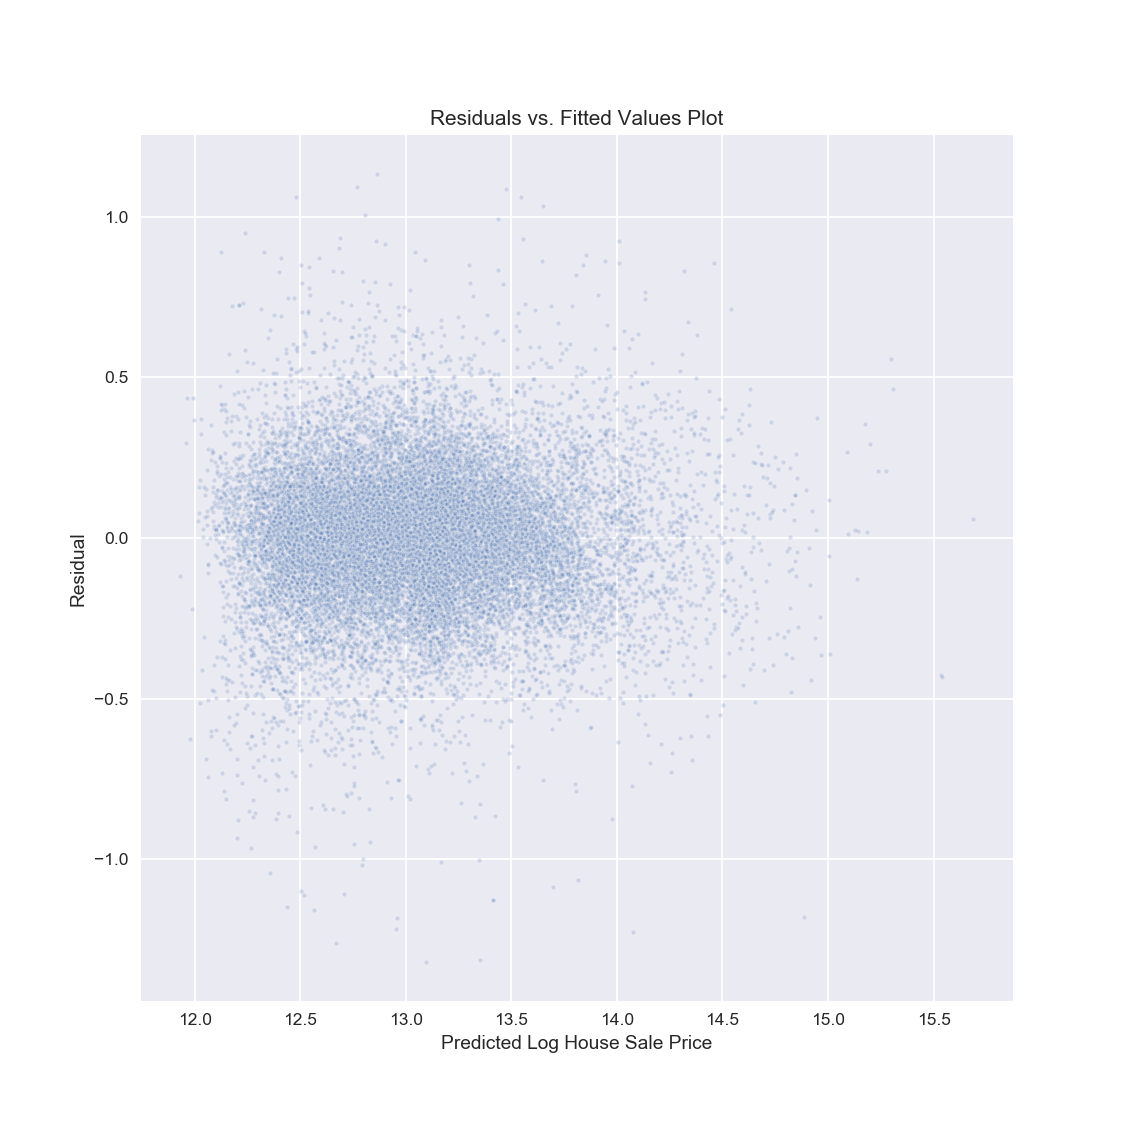

In [69]:
#Residual vs Fitted Value Plot
fig, ax = plt.subplots(figsize=(9,9)) 
sns.scatterplot(x = model.fittedvalues, y = model.resid, ax = ax, s = 7, alpha = 0.2)
ax.set_xlabel('Predicted Log House Sale Price')
ax.set_ylabel('Residual')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

There is no clear evidence of heteroscedasticity in this plot. My sense is that the large residuals seen above are a result of trying to use a linear model when the actual relationships are non-linear. For the sake of this exercise, I will not attempt to extend the modeling approach beyond multiple regression, and will proceed despite the existing non-normality.

## K-fold Cross Validation

I will now evaluate the model using cross-validation. This will help me see how my model performs by testing the predictive power of the model on a held out sample of data. I use the R-squared metric here, since that is what I have been tracking so far in this workbook.

In [68]:
linreg = LinearRegression(normalize = True)
cv_10_results = cross_val_score(linreg, predictors, outcome, cv=10, scoring="r2")
print(cv_10_results)
print(cv_10_results.mean())

[0.84263963 0.84097768 0.83273204 0.84043166 0.82497086 0.8370655
 0.83390651 0.8456475  0.84243823 0.7918169 ]
0.8332626513688265


The range of values for the cross validation are mostly within a small range, suggesting that the model is likely to generalize well to predicting house sale prices outside this dataset.

# Interpret the Results

In this section, I will interpret the results of the final model.

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1116.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:55:30   Log-Likelihood:                 2893.0
No. Observations:               21597   AIC:                            -5584.
Df Residuals:                   21496   BIC:                            -4778.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.3183      0.008   1519.746      0.000      12.302      12.334
bedrooms_2         -0.0639      0.005    -12.727      0.000      -0.074      -0.054
bedrooms_4          0.0697      0.004     19.215      0.000       0.063       0.077
bedrooms_5          0.0792      0.006     12.608      0.000       0.067       0.091
bedrooms_6          0.0870      0.014      6.433      0.000       0.061       0.114
bathrooms_1_0      -0.1021      0.005    -20.526      0.000      -0.112      -0.092
bathrooms_3_0       0.0660      0.005     13.250      0.000       0.056       0.076
bathrooms_4_0       0.1157      0.008     15.374      0.000       0.101       0.130
bathrooms_5_0       0.2691      0.029      9.197      0.000       0.212       0.326
bathrooms_6_0       0.4686      0.045     10.486      0.000       0.381       0.556
bathrooms_8_0       0.5945      0.107      5.536      0.000       0.384       0.805
floors_1_5          0.0770      0.006     13.547      0.000       0.066       0.088
floors_2_0          0.0520      0.004     11.895      0.000       0.043       0.061
floors_2_5          0.1091      0.017      6.242      0.000       0.075       0.143
floors_3_0         -0.1429      0.010    -14.064      0.000      -0.163      -0.123
waterfront_1_0      0.4432      0.022     20.252      0.000       0.400       0.486
view_1_0            0.1613      0.012     13.416      0.000       0.138       0.185
view_2_0            0.1522      0.007     20.835      0.000       0.138       0.167
view_3_0            0.2360      0.010     23.640      0.000       0.216       0.256
view_4_0            0.3652      0.015     24.105      0.000       0.335       0.395
condition_2        -0.1358      0.017     -8.215      0.000      -0.168      -0.103
condition_4         0.0536      0.004     14.686      0.000       0.046       0.061
condition_5         0.1135      0.006     19.583      0.000       0.102       0.125
grade_6            -0.1260      0.006    -21.815      0.000      -0.137      -0.115
grade_8             0.1790      0.004     44.852      0.000       0.171       0.187
grade_9             0.4083      0.006     72.046      0.000       0.397       0.419
grade_10            0.5851      0.008     72.821      0.000       0.569       0.601
grade_11            0.8145      0.012     69.079      0.000       0.791       0.838
sqft_basement_1    -0.0165      0.005     -3.089      0.002      -0.027      -0.006
sqft_basement_2     0.0375      0.006      6.799      0.000       0.027       0.048
sqft_basement_3     0.0527      0.006      9.528      0.000       0.042       0.064
sqft_basement_4     0.0958      0.006     15.853      0.000       0.084       0.108
zipcode_98002      -0.0725      0.017     -4.352      0.000      -0.105      -0.040
zipcode_98004       1.1312      0.014     80.430      0.000

The first thing to notice is that the R-squared is 0.838, meaning that we are explaining about 84% of the variance in the log house sale price with our model. That is pretty high! There are some strong outliears, as seen in the high kurtosis (5.169) and the plots above. This mean that there are more extreme house values than we are able to predict well with our model. The condition number is also high, suggesting that there remains substantial multicollinearity, so we will need to interpret the coefficients with caution.

Using the t statistics, it is possible to identify some of the more important features in the data. For example, the 'grade' category representing the King County grading system seems to be quite important. Higher grade categories have larger coefficients, and some of them have t statistics over 50! For example, a grade of 11 or higher is associated with a log house sale price that is 0.812 points higher than comparable houses with low grades - this translates to 10 ^ 0.8145 = 6.5x greater sales price!

The most important feature seems to be the zip code. This lines up with the cardinal rule of real estate: "Location, Location, Location." There are 70 zip codes included in this dataset, so there are many coefficients capturing this phenomenon, the largest of which is 1.1312 for zip code 98004. That means that, holding all the other characteristics constant, houses in 98004 are the most expensive.

Lastly, I will interpret the coefficient associated with one of the dummy variables: waterfront. Not many houses in this dataset had waterfront views, but those that did were worth more than comparable homes not on the water. The coefficient is 0.4432, which translates to 2.8x greater sales prices. I always knew that waterfront property was expensive, but that's a lot more than I thought!